<a href="https://colab.research.google.com/github/Bossitanmady/BGS-Technologies/blob/main/dissaade_model_ia_pour_la_detection_des_signes_vitaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importation de librairies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Chargement du fichier csv pour la d√©tection d'anomalies des signes vitaux

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving donnees_couveuse_prematures.csv to donnees_couveuse_prematures.csv
User uploaded file "donnees_couveuse_prematures.csv" with length 1183461 bytes


# Stockage des donn√©es dans un objet pandas

In [5]:
df = pd.read_csv('donnees_couveuse_prematures.csv')
# affichage des cinq premiers √©lements du dataset
df.head()

id_bebe  age_gestationnel_semaines  poids_naissance_g  \
0  BEBE_001                         28               1984   
1  BEBE_001                         28               1984   
2  BEBE_001                         28               1984   
3  BEBE_001                         28               1984   
4  BEBE_001                         28               1984   

                 heure  freq_cardiaque_bpm  freq_respiratoire_rpm  \
0  2025-01-01 00:00:00               138.3                   50.7   
1  2025-01-01 00:01:00               152.3                   47.7   
2  2025-01-01 00:02:00               129.9                   54.4   
3  2025-01-01 00:03:00               168.2                   51.3   
4  2025-01-01 00:04:00               180.7                   58.2   

   spo2_percent  temperature_c  pression_arterielle_mmhg  humidite_percent  \
0          88.9           36.5                      53.0              51.5   
1          93.0           36.4                      56.7              57.7   
2          93.8           36.3                      52.7              46.1   
3          88.6           36.2                      62.3              38.3   
4          94.7           36.6                      53.0              47.8   

   poids_bebe_g anomalie_detectee type_anomalie  
0          1984               non          rien  
1          1984               non          rien  
2          1984               non          rien  
3          1984               non          rien  
4          1984               non          rien

In [6]:
# La statistiques descriptives du datasets
df.describe()

age_gestationnel_semaines  poids_naissance_g  freq_cardiaque_bpm  \
count               14400.000000       14400.000000        14400.000000   
mean                   30.250000        1676.750000          149.975455   
std                     2.547146         354.658318           15.405721   
min                    26.000000        1017.000000           69.928576   
25%                    28.000000        1406.000000          139.775000   
50%                    31.000000        1739.000000          149.900000   
75%                    33.000000        1987.500000          160.100000   
max                    34.000000        2192.000000          214.324237   

       freq_respiratoire_rpm  spo2_percent  temperature_c  \
count           14400.000000  14400.000000   14400.000000   
mean               49.917187     91.941745      36.498979   
std                10.202078      3.081547       0.299699   
min                 0.000000     71.440987      35.300000   
25%                43.100000     90.000000      36.300000   
50%                50.100000     92.000000      36.500000   
75%                56.600000     94.000000      36.700000   
max                88.000000    102.800000      37.700000   

       pression_arterielle_mmhg  humidite_percent  poids_bebe_g  
count              14400.000000      14400.000000  14400.000000  
mean                  60.069049         55.031792   1676.750000  
std                   10.097074          9.966940    354.658318  
min                   14.600000         18.100000   1017.000000  
25%                   53.375000         48.300000   1406.000000  
50%                   60.200000         55.000000   1739.000000  
75%                   66.800000         61.700000   1987.500000  
max                   97.400000         94.700000   2192.000000

In [7]:
# Informations du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_bebe                    14400 non-null  object 
 1   age_gestationnel_semaines  14400 non-null  int64  
 2   poids_naissance_g          14400 non-null  int64  
 3   heure                      14400 non-null  object 
 4   freq_cardiaque_bpm         14400 non-null  float64
 5   freq_respiratoire_rpm      14400 non-null  float64
 6   spo2_percent               14400 non-null  float64
 7   temperature_c              14400 non-null  float64
 8   pression_arterielle_mmhg   14400 non-null  float64
 9   humidite_percent           14400 non-null  float64
 10  poids_bebe_g               14400 non-null  int64  
 11  anomalie_detectee          14400 non-null  object 
 12  type_anomalie              14400 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usag

In [8]:
# Description des colonnes du dataset

# Dictionnaire des descriptions
descriptions = {
    "id_bebe": "Identifiant unique du b√©b√©",
    "age_gestationnel_semaines": "√Çge gestationnel du b√©b√© √† la naissance, en semaines",
    "poids_naissance_g": "Poids √† la naissance du b√©b√©, en grammes",
    "heure": "Heure d‚Äôenregistrement des donn√©es",
    "freq_cardiaque_bpm": "Fr√©quence cardiaque du b√©b√©, en battements par minute (BPM)",
    "freq_respiratoire_rpm": "Fr√©quence respiratoire du b√©b√©, en respirations par minute (RPM)",
    "spo2_percent": "Saturation en oxyg√®ne du sang du b√©b√©, en pourcentage",
    "temperature_c": "Temp√©rature corporelle du b√©b√©, en degr√©s Celsius",
    "pression_arterielle_mmhg": "Pression art√©rielle du b√©b√©, en mmHg",
    "humidite_percent": "Taux d‚Äôhumidit√© ambiante, en pourcentage",
    "poids_bebe_g": "Poids actuel du b√©b√©, en grammes",
    "anomalie_detectee": "Indicateur binaire pr√©cisant si une anomalie a √©t√© d√©tect√©e ('oui' ou 'non')",
    "type_anomalie": "Type sp√©cifique d‚Äôanomalie d√©tect√©e (ex : hypothermie, tachycardie, etc.)"
}

# Cr√©ation du DataFrame
df_description = pd.DataFrame(list(descriptions.items()), columns=["colonne", "description"])

df_description.head(12)


colonne  \
0                     id_bebe   
1   age_gestationnel_semaines   
2           poids_naissance_g   
3                       heure   
4          freq_cardiaque_bpm   
5       freq_respiratoire_rpm   
6                spo2_percent   
7               temperature_c   
8    pression_arterielle_mmhg   
9            humidite_percent   
10               poids_bebe_g   
11          anomalie_detectee   

                                          description  
0                          Identifiant unique du b√©b√©  
1   √Çge gestationnel du b√©b√© √† la naissance, en se...  
2            Poids √† la naissance du b√©b√©, en grammes  
3                  Heure d‚Äôenregistrement des donn√©es  
4   Fr√©quence cardiaque du b√©b√©, en battements par...  
5   Fr√©quence respiratoire du b√©b√©, en respiration...  
6   Saturation en oxyg√®ne du sang du b√©b√©, en pour...  
7   Temp√©rature corporelle du b√©b√©, en degr√©s Celsius  
8                Pression art√©rielle du b√©b√©, en mmHg  
9            Taux d‚Äôhumidit√© ambiante, en pourcentage  
10                   Poids actuel du b√©b√©, en grammes  
11  Indicateur binaire pr√©cisant si une anomalie a...

In [9]:
# Identification des variables categorielles du jeu de donn√©es
colonnes_categorielles = df.select_dtypes(include=['object']).columns
print("Variables cat√©gorielles:")
print(colonnes_categorielles)

Variables cat√©gorielles:
Index(['id_bebe', 'heure', 'anomalie_detectee', 'type_anomalie'], dtype='object')


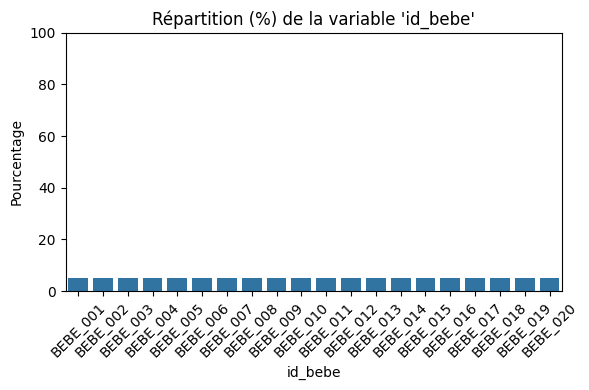

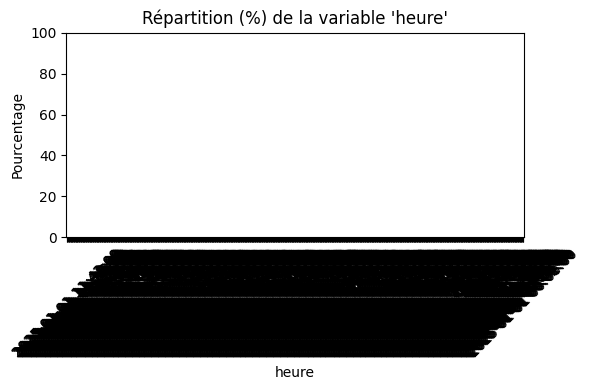

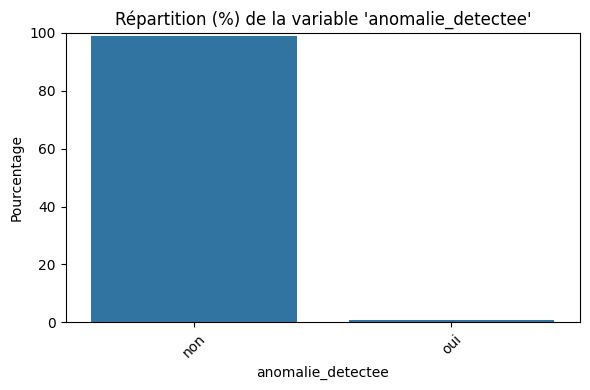

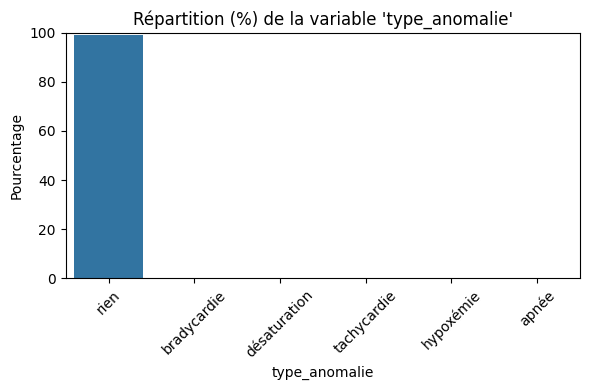

In [10]:
# S√©lectionner les colonnes cat√©gorielles
colonnes_categorielles = df.select_dtypes(include=['object', 'category']).columns

# Afficher un graphique pour chaque variable cat√©gorielle
for col in colonnes_categorielles:
    valeurs = df[col].value_counts(normalize=True) * 100

    plt.figure(figsize=(6, 4))
    sns.barplot(x=valeurs.index, y=valeurs.values)
    plt.title(f"R√©partition (%) de la variable '{col}'")
    plt.ylabel("Pourcentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()


In [11]:
# verification combien de vraies anomalies
df['anomalie_detectee'].value_counts()

anomalie_detectee
non    14261
oui      139
Name: count, dtype: int64

In [12]:
# Selection des variables numerique utiles
colonnes_utiles = [
    'age_gestationnel_semaines', 'poids_naissance_g', 'freq_cardiaque_bpm',
    'freq_respiratoire_rpm', 'spo2_percent', 'temperature_c',
    'pression_arterielle_mmhg', 'humidite_percent', 'poids_bebe_g'
]

X = df[colonnes_utiles].copy()

In [13]:
# Detection des valeurs manquantes
X.isnull().sum()

age_gestationnel_semaines    0
poids_naissance_g            0
freq_cardiaque_bpm           0
freq_respiratoire_rpm        0
spo2_percent                 0
temperature_c                0
pression_arterielle_mmhg     0
humidite_percent             0
poids_bebe_g                 0
dtype: int64

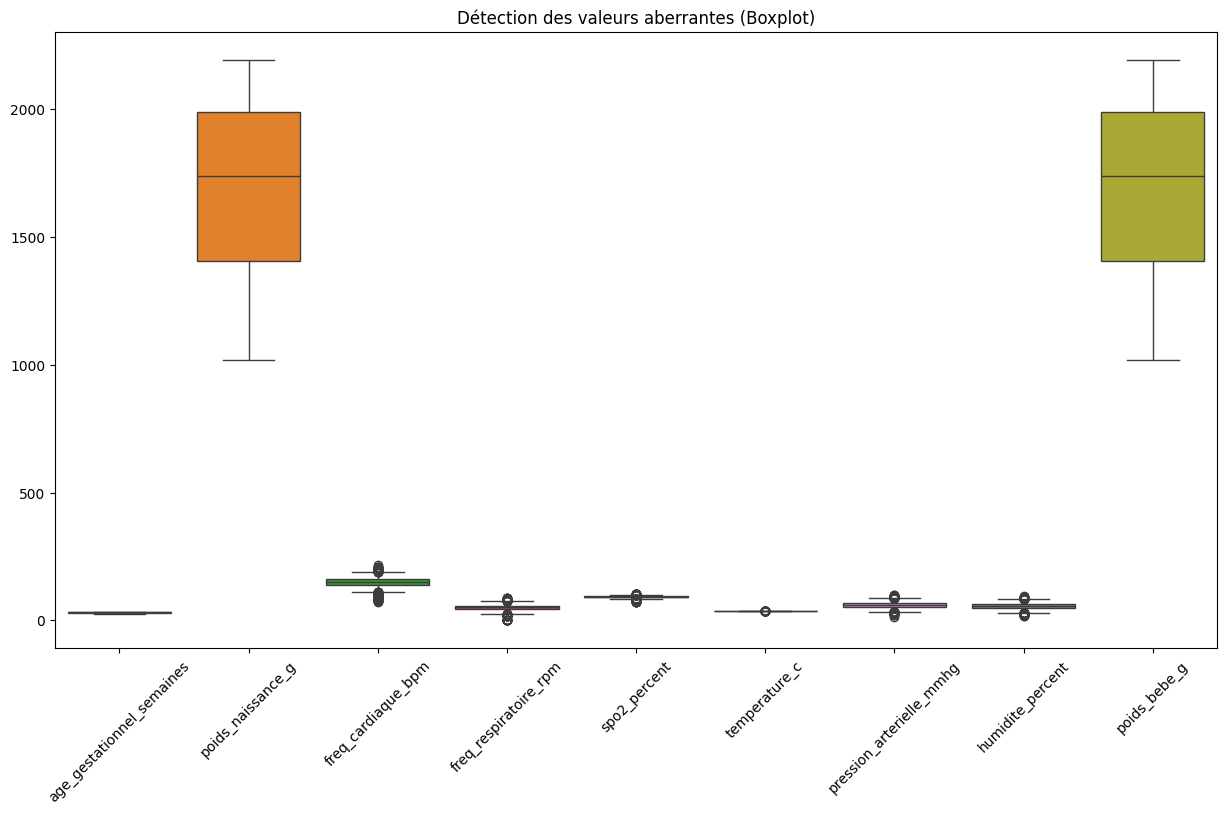

In [14]:
# D√©tection des valeurs abberantes ou extr√™mes

# Boxplot de toutes les variables num√©riques

plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("D√©tection des valeurs aberrantes (Boxplot)")
plt.show()

In [15]:
# Methode statistique: √©cart interquartile (IQR)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# D√©tection des outliers
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Nombre d'outliers par colonne
print(outliers.sum())

age_gestationnel_semaines      0
poids_naissance_g              0
freq_cardiaque_bpm           155
freq_respiratoire_rpm        138
spo2_percent                 127
temperature_c                 56
pression_arterielle_mmhg     123
humidite_percent             101
poids_bebe_g                   0
dtype: int64


In [16]:
# Normalisation (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Extraction des cas normaux uniquement pour l'entrainement
# on ne garde que les lignes o√π il n'y a pas d'anomalie
df_normaux = df[df["anomalie_detectee"]=="non"]
X_train = df_normaux[colonnes_utiles].copy()
X_train_scaled = scaler.fit_transform(X_train)

# Etapes de visualistion des variables num√©riques
## Courbe de distribution pour chaque variable

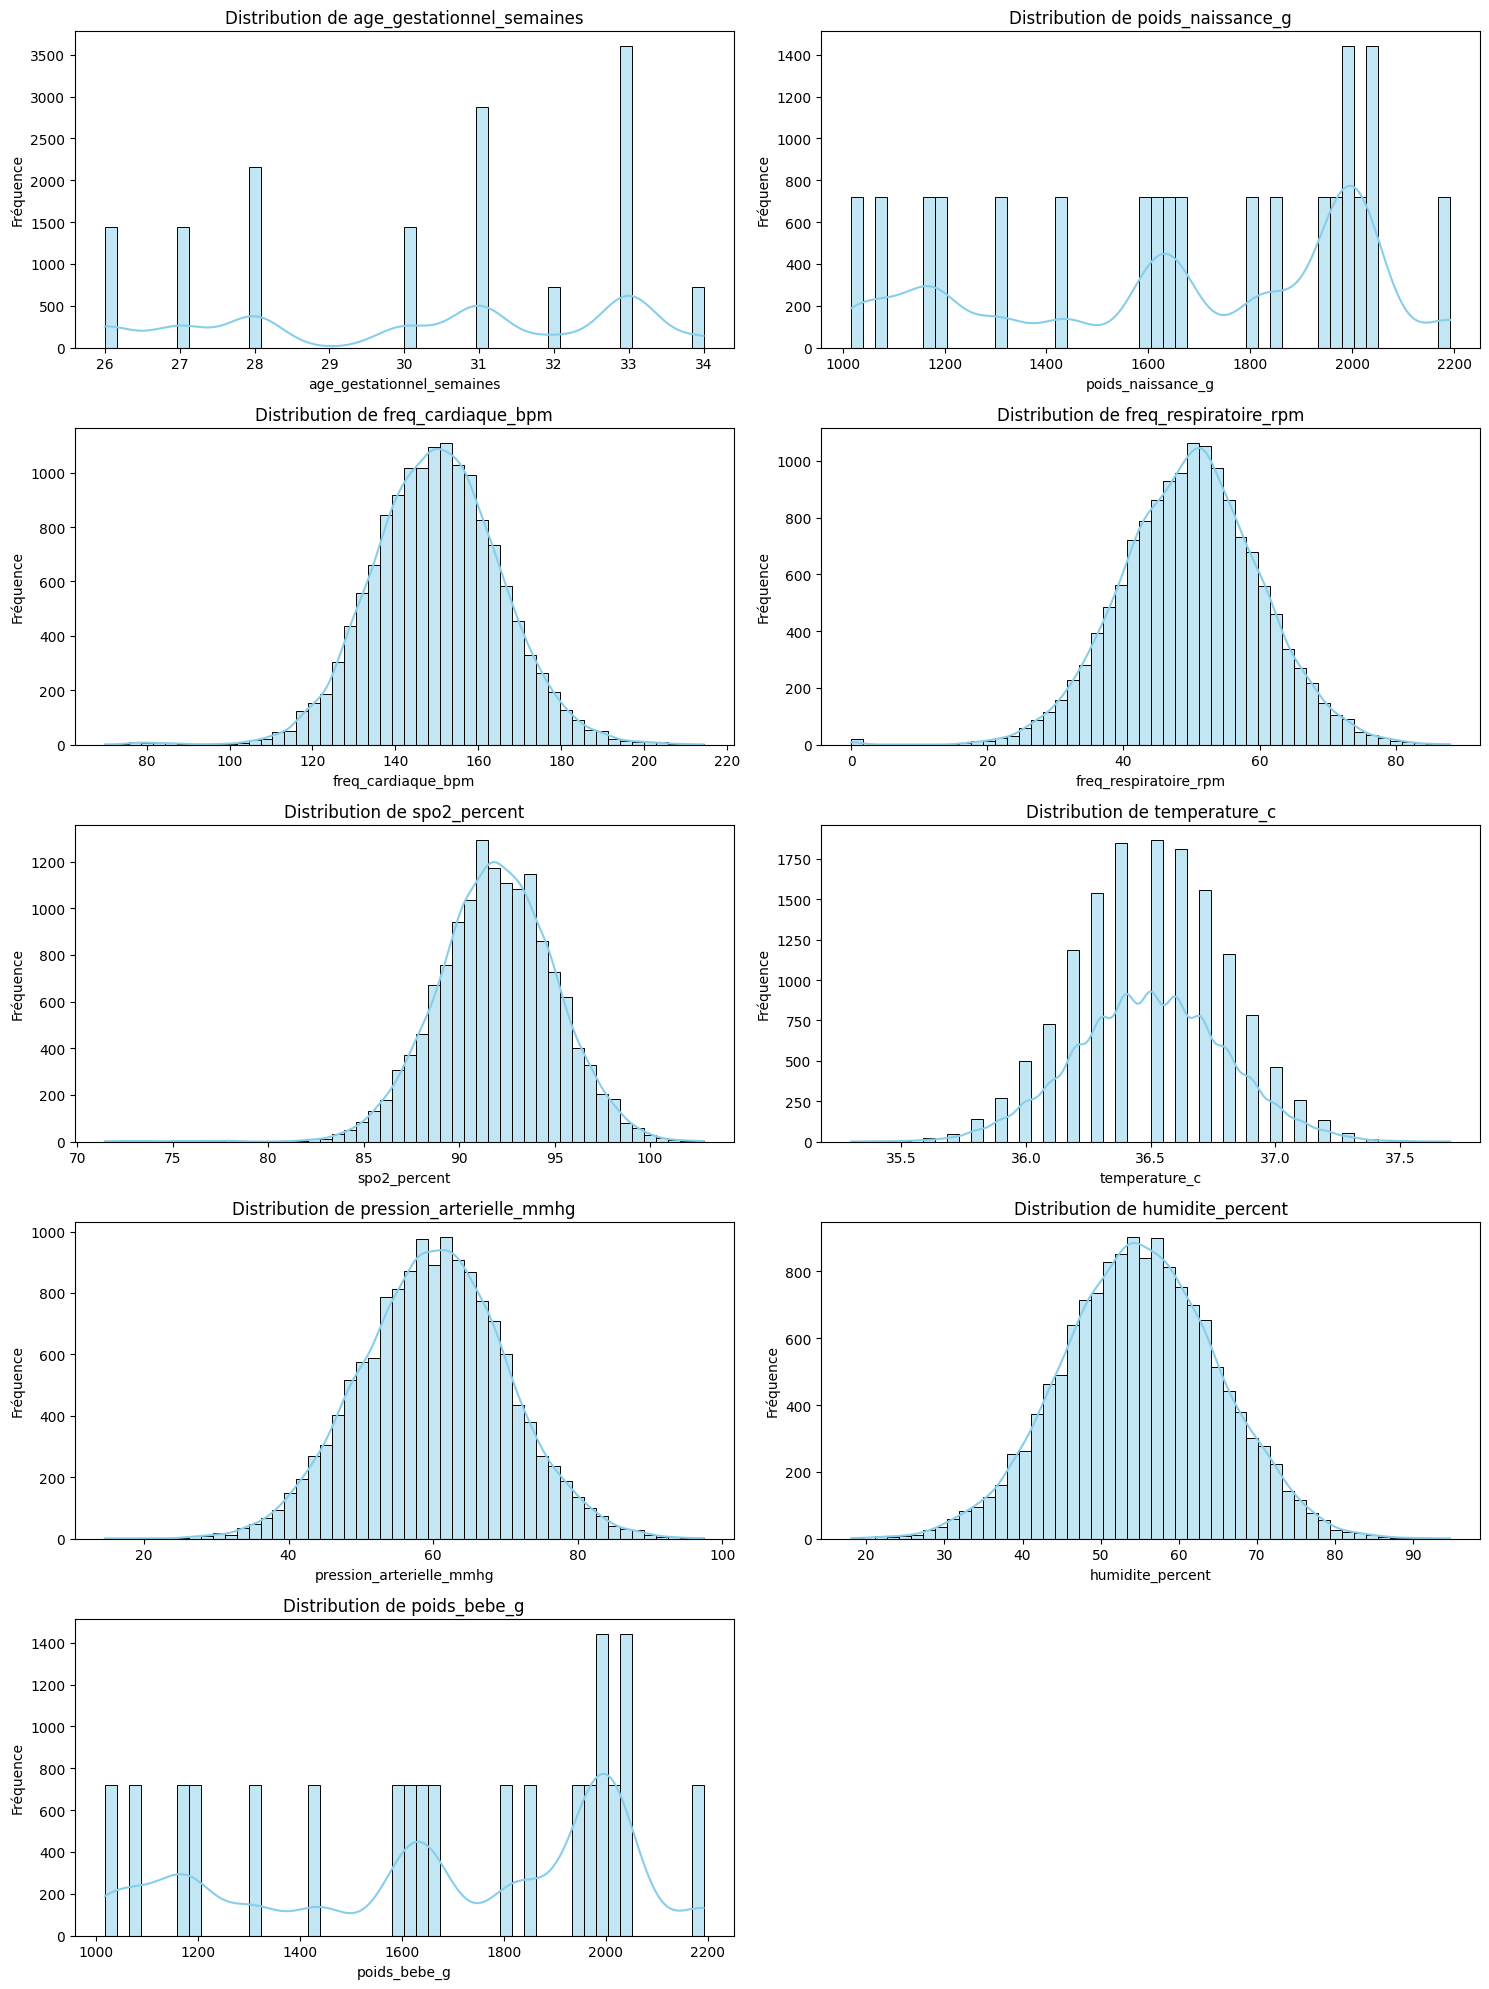

In [18]:
# Fixer la taille de l'ensemble des graphiques
plt.figure(figsize=(15, 20))

# Parcourir chaque variable num√©rique
for i, col in enumerate(X.select_dtypes(include='number').columns):
    plt.subplot(5, 2, i + 1)
    sns.histplot(X[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel("Fr√©quence")

plt.tight_layout()
plt.show()

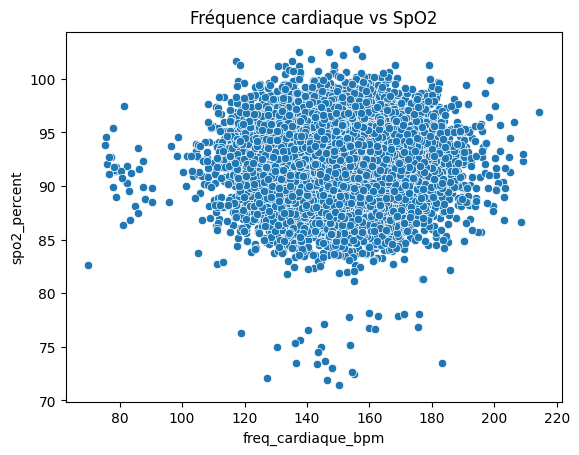

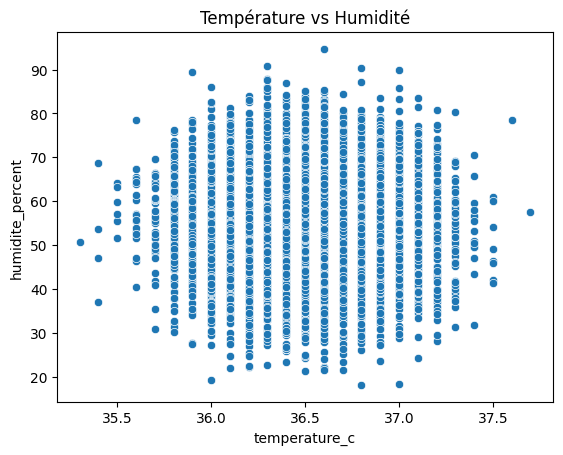

In [19]:
# nuages des points
# Fr√©quence cardiaque vs SpO2
sns.scatterplot(x='freq_cardiaque_bpm', y='spo2_percent', data=X)
plt.title("Fr√©quence cardiaque vs SpO2")
plt.show()

# Temp√©rature vs Humidit√©
sns.scatterplot(x='temperature_c', y='humidite_percent', data=X)
plt.title("Temp√©rature vs Humidit√©")
plt.show()


# Entrrainement du mod√®le TensorFlow
Entra√Æner un AutoEncoder pour apprendre les "valeurs normales" des capteurs vitaux des b√©b√©s. Ensuite, on d√©tecte les anomalies en mesurant l‚Äôerreur de reconstruction (si l‚Äôerreur est √©lev√©e ‚Üí anomalie probable).

# 1) Pr√©paration des donn√©es

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1Ô∏è‚É£ Dimensions d'entr√©e
input_dim = X_train_scaled.shape[1]

#  2. Construction du mod√®le AutoEncoder (avec Keras / TensorFlow)

In [21]:
# 2Ô∏è‚É£ D√©finition du mod√®le
input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation="relu")(input_layer)
encoded = layers.Dense(32, activation="relu")(encoded)

decoded = layers.Dense(64, activation="relu")(encoded)
output_layer = layers.Dense(input_dim, activation="linear")(decoded)

autoencoder = keras.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)        ‚îÇ (None, 9)              ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 64)             ‚îÇ           640 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 32)             ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         2,112 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 9)              ‚îÇ           585 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 5,417 (21.16 KB)

 Trainable params: 5,417 (21.16 KB)

 Non-trainable params: 0 (0.00 B)

#  3. Entra√Ænement du mod√®le

In [22]:
# Entra√Ænement (pas besoin d'√©tiquettes)
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.1
)


Epoch 1/50
402/402 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 6ms/step - loss: 0.3940 - val_loss: 0.0101
Epoch 2/50
402/402 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 0.0077 - val_loss: 0.0063
Epoch 3/50
402/402 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 4/50
402/402 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 5/50
402/402 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/50
402/402 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 7.8512e-04 - val_loss: 8.1748e-04
Epoch 7/50
402/402 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 5.1654e-04 - val_loss: 4.3415e-04
Epoch 8/50
402/402 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 2.

# 4. Affichage de la courbe de perte

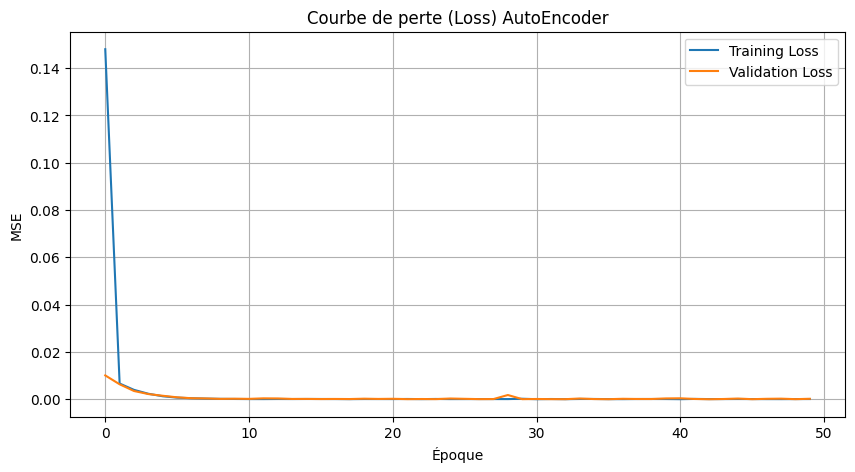

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Courbe de perte (Loss) AutoEncoder")
plt.xlabel("√âpoque")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

# üîÅ 1. Am√©lioration de l'AutoEncoder (structure + seuil)
##‚úÖ a. Structure plus robuste de l‚ÄôAutoEncoder

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_train_scaled.shape[1]
encoding_dim = input_dim // 2  # peut √™tre ajust√©

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)
encoded = Dense(encoding_dim // 2, activation="relu")(encoded)

decoded = Dense(encoding_dim, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.summary()


Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1 (InputLayer)      ‚îÇ (None, 9)              ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 4)              ‚îÇ            40 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 2)              ‚îÇ            10 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 4)              ‚îÇ            12 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_7 (Dense)                 ‚îÇ (None, 9)              ‚îÇ            45 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 107 (428.00 B)

 Trainable params: 107 (428.00 B)

 Non-trainable params: 0 (0.00 B)

# ‚úÖ b. R√©entra√Æner + nouvelle √©valuation + seuil

In [25]:
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

# Nouveau seuil d‚Äôanomalie bas√© sur quantile 95
reconstruction_errors = np.mean((autoencoder.predict(X_train_scaled) - X_train_scaled)**2, axis=1)
threshold = np.percentile(reconstruction_errors, 95)
print("Seuil d‚Äôanomalie recalcul√© :", threshold)

Epoch 1/50
357/357 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 6ms/step - loss: 0.9835 - val_loss: 0.9163
Epoch 2/50
357/357 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - loss: 0.7764 - val_loss: 0.8209
Epoch 3/50
357/357 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.7026 - val_loss: 0.7822
Epoch 4/50
357/357 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.6766 - val_loss: 0.7641
Epoch 5/50
357/357 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.6548 - val_loss: 0.7543
Epoch 6/50
357/357 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.6551 - val_loss: 0.7511
Epoch 7/50
357/357 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - loss: 0.6604 - val_loss: 0.7512
Epoch 8/50
357/357 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - loss: 0.6504 - val_loss:

#2. Appliquer le mod√®le √† tout le dataset + d√©tecter les anomalies
### a. Pr√©paration des donn√©es

In [26]:
# On prend tout le dataset, pas juste les normaux
X_all = df[colonnes_utiles].copy()
X_all_scaled = scaler.transform(X_all)

###  b. Pr√©diction avec l‚Äôautoencoder

In [27]:
# Reconstruction
X_pred_scaled = autoencoder.predict(X_all_scaled)


450/450 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1ms/step


### c. Calcul de l‚Äôerreur de reconstruction (MSE)

In [28]:
# Erreur pour chaque ligne
reconstruction_errors = np.mean(np.square(X_all_scaled - X_pred_scaled), axis=1)

# Ajout dans le dataframe
df["reconstruction_error"] = reconstruction_errors


### d. D√©finir un seuil d‚Äôanomalie

In [29]:
threshold = np.percentile(
    df[df["anomalie_detectee"] == "non"]["reconstruction_error"], 95
)
print("Seuil d‚Äôanomalie :", threshold)


Seuil d‚Äôanomalie : 1.359288642539398


### e. D√©tection automatique

In [30]:
df["anomalie_predite"] = df["reconstruction_error"] > threshold
df["anomalie_predite"] = df["anomalie_predite"].astype(int)
df["anomalie_predite"].value_counts()

anomalie_predite
0    13579
1      821
Name: count, dtype: int64

#  3. üíæ Sauvegarde du mod√®le et la convertion en .tflite pour Edge Impulse
###  a. Sauvegarde du mod√®le au format .h5

In [40]:
# Supposons que tu as d√©j√† un mod√®le entra√Æn√© nomm√© "autoencoder"
autoencoder.save("autoencoder_anomalie.h5")

### R√©chargement du mod√®le sauvegarder

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

model_path = "autoencoder_anomalie.h5"
autoencoder = load_model(model_path, compile=False)
autoencoder.compile(optimizer="adam", loss=MeanSquaredError())

### b. Conversion en .tflite (avec optimisations)



In [42]:
# ‚úÖ 2. Cr√©er un convertisseur TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)

# üí° 3. Optimisation recommand√©e pour l'inf√©rence sur microcontr√¥leurs
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# ‚úÖ 4. Conversion du mod√®le
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpt96nf0du'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  140520309439760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370827344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370830032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370828880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370828496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520370822160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520309489744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140520309489936: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [43]:
# Sauvegarder le mod√®le TFLite dans un fichier
with open("autoencoder_anomalie.tflite", "wb") as f:
    f.write(tflite_model)


# 4.  Visualisation des erreurs / anomalies
### a. Histogramme des erreurs de reconstruction

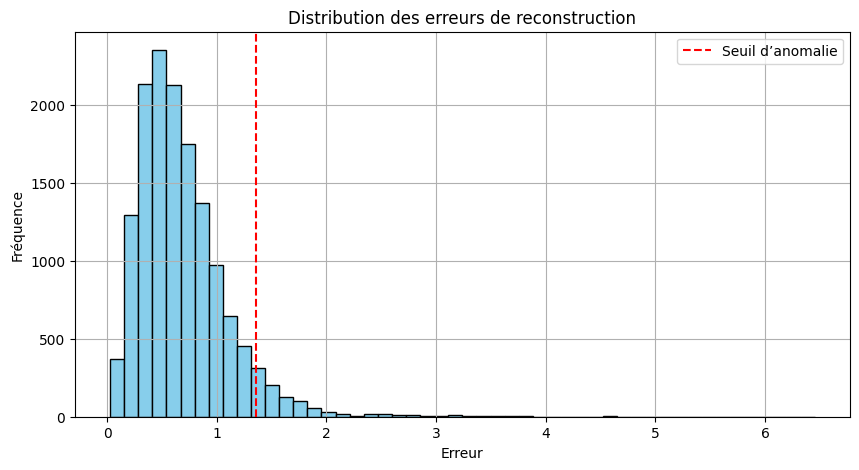

In [44]:
plt.figure(figsize=(10, 5))
plt.hist(df["reconstruction_error"], bins=50, color="skyblue", edgecolor="black")
plt.axvline(threshold, color="red", linestyle="--", label="Seuil d‚Äôanomalie")
plt.title("Distribution des erreurs de reconstruction")
plt.xlabel("Erreur")
plt.ylabel("Fr√©quence")
plt.legend()
plt.grid(True)
plt.show()

### b. Affichage des anomalies pr√©dites


In [45]:
anomalies_detectees = df[df["anomalie_predite"] == True]
print("Nombre d‚Äôanomalies d√©tect√©es :", len(anomalies_detectees))
anomalies_detectees.head()

Nombre d‚Äôanomalies d√©tect√©es : 821


id_bebe  age_gestationnel_semaines  poids_naissance_g  \
13  BEBE_001                         28               1984   
34  BEBE_001                         28               1984   
53  BEBE_001                         28               1984   
54  BEBE_001                         28               1984   
66  BEBE_001                         28               1984   

                  heure  freq_cardiaque_bpm  freq_respiratoire_rpm  \
13  2025-01-01 00:13:00               151.7                   48.1   
34  2025-01-01 00:34:00               116.6                   61.7   
53  2025-01-01 00:53:00               147.0                   39.5   
54  2025-01-01 00:54:00               127.9                   46.9   
66  2025-01-01 01:06:00               152.8                   53.3   

    spo2_percent  temperature_c  pression_arterielle_mmhg  humidite_percent  \
13          86.0           37.0                      38.2              39.8   
34          96.9           36.2                      41.8              47.4   
53          97.9           36.6                      32.7              56.4   
54          96.3           36.3                      84.6              72.7   
66          90.7           36.6                      58.3              22.2   

    poids_bebe_g anomalie_detectee type_anomalie  reconstruction_error  \
13          1984               non          rien              1.612138   
34          1984               non          rien              1.566363   
53          1984               non          rien              1.363493   
54          1984               non          rien              1.562059   
66          1984               non          rien              1.373344   

    anomalie_predite  
13                 1  
34                 1  
53                 1  
54                 1  
66                 1

# üíæ 3. T√©l√©chargement du  mod√®le dans le PC (local)

In [46]:
from google.colab import files

# T√©l√©charger le mod√®le Keras
files.download("autoencoder_anomalie.h5")

# T√©l√©charger le mod√®le TFLite
files.download("autoencoder_anomalie.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>